In [ ]:
pip install -r requirements.txt

In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sharelib import *
import logging
from pathlib import Path
import json
import glob
import sys

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [36]:
if __name__ == "__main__":
    df = pd.DataFrame()
    path_to_json = 'rawdata3' 
    json_pattern = os.path.join(path_to_json,'*.txt')
    file_list = glob.glob(json_pattern)
    
    xcount = 0

    for file in file_list:
        xcount = xcount + 1
        print("xcount: ", xcount)
        data = pd.read_json(file, lines=True)
        df = pd.concat([df,data], ignore_index = True)

xcount:  1


In [37]:
    cov = np.array([[1, .5],[.5, 1]])
    print(cov)
    X = np.random.RandomState(0).multivariate_normal(mean=[0, 0],
                                                 cov=cov, size=100)
    print(X)

    ee_detector = EllipticEnvelope(contamination=0.1).fit(X)
    ee_detect = ee_detector.predict(X)
    print(ee_detect)

[[1.  0.5]
 [0.5 1. ]]
[[-1.72779275 -1.32763554]
 [-1.96805856  0.27283464]
 [-1.12871372 -2.1059916 ]
 [-0.7471221  -0.89847931]
 [-0.1159091   0.2946894 ]
 [-0.85188215  0.60239136]
 [-0.71991551 -0.59824049]
 [-0.551234   -0.21755967]
 [-1.1913313  -1.39648956]
 [ 0.15592329 -0.69817245]
 [ 1.88414474  2.53776333]
 [-0.3775412  -1.11970622]
 [-1.23848233 -2.692848  ]
 [ 0.05396389 -0.13321996]
 [-2.06210512 -0.59274635]
 [-0.32326967  0.05489285]
 [ 1.75924324 -0.22155322]
 [ 0.22312628  0.37947524]
 [-1.66665291 -0.46427306]
 [ 0.48658624  0.18428349]
 [ 1.61808247  0.19806454]
 [ 0.50228563  2.45306103]
 [ 0.66040889  0.22233459]
 [ 0.69620743  1.47369779]
 [ 1.50404668  1.29130639]
 [ 0.58204554  0.96894804]
 [ 1.03268632 -0.14794587]
 [-0.18975941  0.23857246]
 [-0.20884155  0.09363034]
 [ 0.73070963  0.36796846]
 [ 0.76214441  0.40259125]
 [ 1.56734664 -0.15893596]
 [ 0.04723492 -0.35454601]
 [ 1.18040205  1.64318431]
 [ 0.75977073  0.81171613]
 [-0.6959024  -0.56691949]
 [-0.

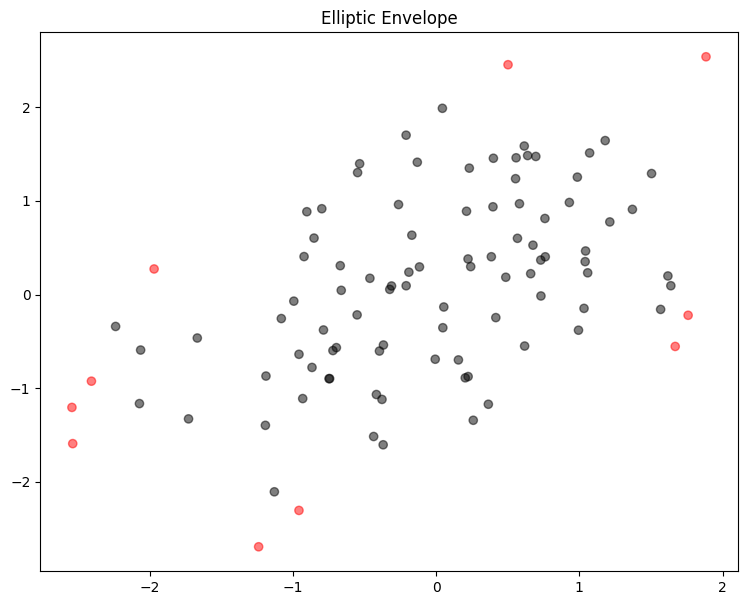

In [38]:
    # Plot the data
    plt.figure(figsize=(9,7))
    plt.scatter(X[:, 0], X[:, 1], c=ee_detect, cmap="flag", alpha=0.5)
    plt.title("Elliptic Envelope")
    plt.show()

In [39]:
    if_detector = IsolationForest(n_estimators=10, contamination=0.1).fit(X)
    if_detect = if_detector.predict(X)
    print(if_detect)

[ 1 -1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1 -1  1  1
 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1]


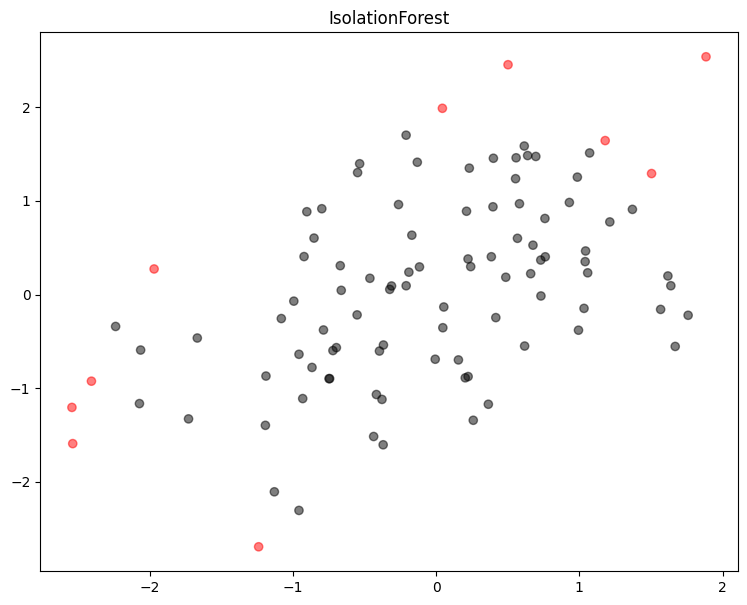

In [40]:
    # Plot the data
    plt.figure(figsize=(9,7))
    plt.scatter(X[:, 0], X[:, 1], c=if_detect, cmap="flag", alpha=0.5)
    plt.title("IsolationForest")
    plt.show()

In [43]:
    # Call and fit the Local Outlier Factor detector

    lof_detector = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
    lof_detect = lof_detector.fit_predict(X)
    print(lof_detect)

[ 1 -1 -1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1 -1]


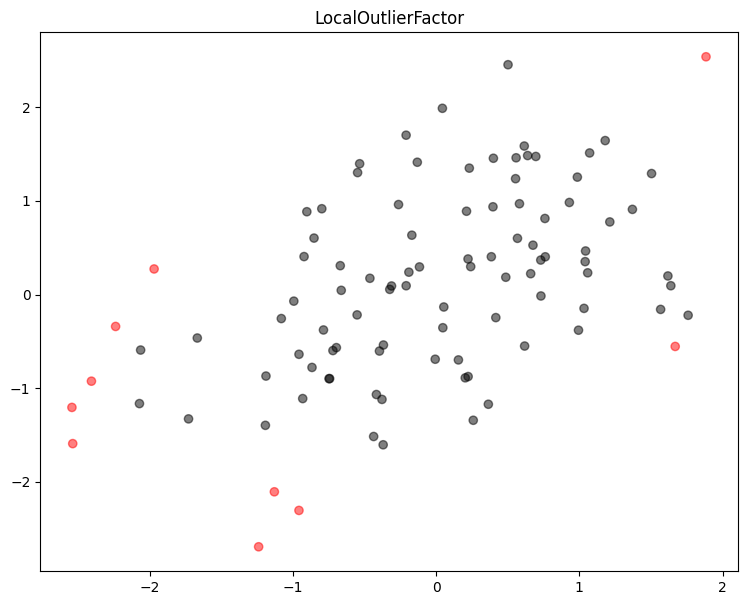

In [44]:
plt.figure(figsize=(9,7))
plt.scatter(X[:, 0], X[:, 1], c=lof_detect, cmap="flag", alpha=0.5)
plt.title("LocalOutlierFactor")
plt.show()

In [55]:
# Call and fit the One Class SVM detector
X_new = np.array([[-1.534,-1.08777],
                [1.323,1.878],
                [1.4555,-1.212]])

svm_detector = OneClassSVM(tol=0.1, nu=0.1, gamma=0.1).fit(X)
print(svm_detector)
svm_detect = svm_detector.predict(X_new)
print(svm_detect)

OneClassSVM(gamma=0.1, nu=0.1, tol=0.1)
[ 1 -1 -1]
